<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [2]:
! pip install --quiet vietocr

     |████████████████████████████████| 948 kB 58.3 MB/s 
     |████████████████████████████████| 280 kB 69.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


# Inference

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [4]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [19]:
# config['weights'] = './weights/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

In [20]:
detector = Predictor(config)

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp1hq1_n5r/dl
100%|██████████| 152M/152M [00:00<00:00, 307MB/s]


In [9]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 109MB/s]


('sang, được mọi nguồi nề phạc.', 0.7895591330939326)


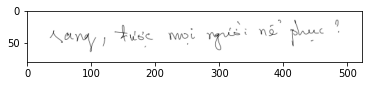

('trong lên cũng thao biển " giờ làm an " Trong khi chi án thầu có cây trường', 0.7206721315781276)


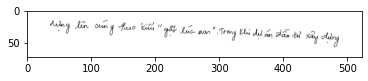

('tạo tạm 20 được có có quan chức này ở Đồng thai thống nhất chuyển xay xứ lý và bộ.', 0.8172144940713557)


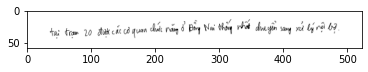

('bị các Pham Văn Quân về Bách nhiện trung vập thêm định, ký nấy cây cả', 0.7588057029938352)


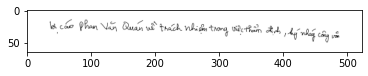

('giúp', 0.9294120371341705)


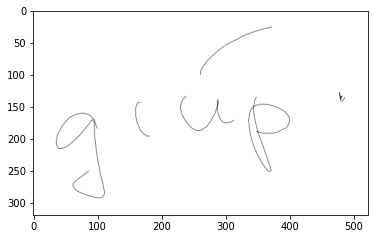

('ngày cả và tác.. Nhất mác và sị thủng nhất vẫn còn huận sẽ trên rằng khải mặt.', 0.7549265294502943)


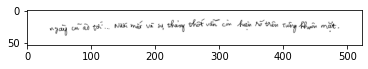

('chiến là bai mà được công ty Trường 5 km dùng lên đó tạm hòa " nhà', 0.7723678637183073)


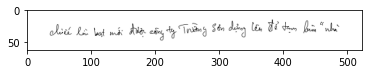

('cho thấy bốn đối tướng có hành vi đi sau nhân lự biết', 0.817518117292872)


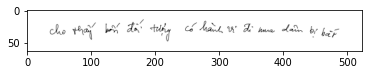

('ký luật trung bị máng bình chính, công cao thiên châu trước nhận và', 0.8237441729253797)


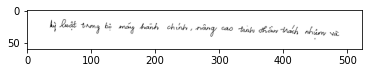

('không kép nhìn, từ phụ để nhanh nhai sự những đây mống chuy mà giới', 0.795533850121854)


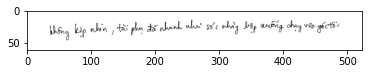

('UPNNO TP đi chính khác ra khi, tương hơn nghình và học nương những', 0.7481678009710528)


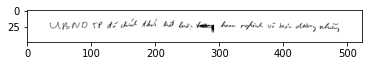

('đang liệt và hoạn đồng bố thá đã tinh khôn.', 0.6915571034647697)


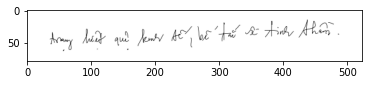

('người và vào thêm tiên, để lớn... Khuôn mua cao trường là với thủ , nam trên', 0.7396702712499782)


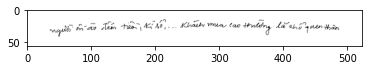

('tran mái máu tài đại học, có bao Việt biển sâu khi xát ninh và thành là số " Khác bằng đầu,', 0.6492128576878663)


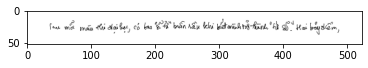

('Thành công là thời bố cao cao bao có đông đã trai vào bộ, có những của có mà thời các', 0.6647159721044933)


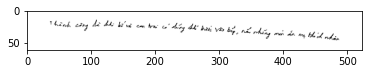

('"Năm phòng đương ký quyền tử dụng đối không khác hồ mới lạp phiện hanh chính ra Đinuật tổ chức tội', 0.7651333497190962)


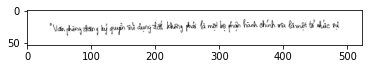

('không có đường, bị chuyển nhượng. ""tiên " qua lại giữa nhân nhà một giái', 0.8458892298887853)


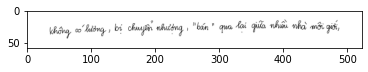

('có liên quan Được hiếp đầu sự phân sinh của đến mưới, đến và, mánh và bạch', 0.7775328781556439)


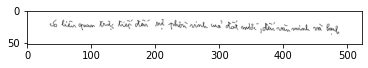

('Đia này trên đ000 mạ ở ấy sang châu 1, và Thuật Ngày tây, Huyện châu hành', 0.72799242502206)


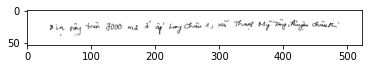

('đạo xe đó hay và điểm một chuyển xã thì như khi số chung đã xêm con. Nhưng ở những', 0.7306821682467693)


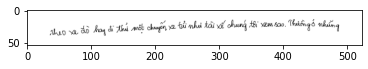

('đã nhà vợ hầu này đấu tình hoàng khác. Có lấy chiến đạo trên rên đối để biết', 0.749103714957049)


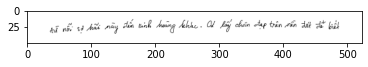

('Và để nhỏ thai minh', 0.8150172813942558)


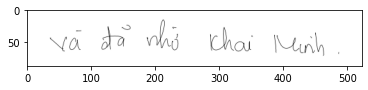

('hoanh nghiệp nhà mách và việc tố chức cấp sắp lại danh nghiệp của', 0.8085721859565148)


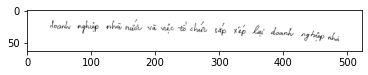

('khiết học Lư pan của sử đầu hoa Công còn TRACH. có ông định họ', 0.6793686802829465)


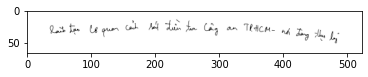

('Tiện nghiệt, họ tràn là người triều thất... ". một chủ quan ở điều là, triển vai bên', 0.7439809734267848)


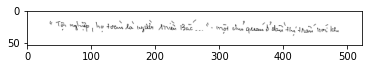

('Cách Vinh bình, đông mất lại ở trai duyền Pha hoang hơm Của cách', 0.7344224145635962)


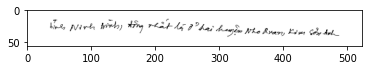

('kế loan giờ hạn bị thời thành công là gì mà hoa hói bổ có cuộc đó mình theo hước', 0.7268397932872176)


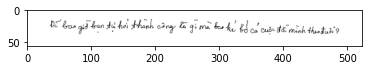

('đái họ các NV2, 1005 Quan trong là họ đã có lập lới văn để biếng lịch mình tối họ', 0.7378557201152967)


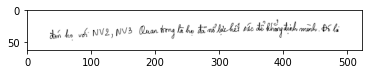

('một cách giản dị đến bất ngở.', 0.8932771425822685)


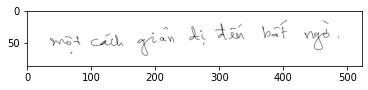

('ngõ uyên cuối bap bê ? Và cuống chính sĩ mới đau màng, anh để quyết', 0.8257718313096175)


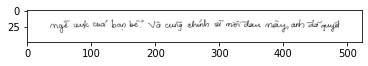

('bớn khách mua dân, nhưng trong cáo trọng không một đồng đề cập đối', 0.8581615907676292)


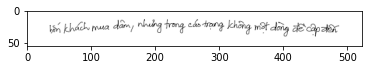

('cơ quan chứ nâng ở Đóng Nhi thông nhất chuyển sang xết lý một bự.', 0.8284965606836172)


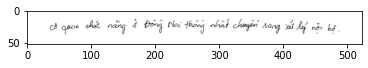

('đi Danh công thây lâm (ha hướng đông và lực mà dùng cần trước tây trước.)', 0.7352813825215379)


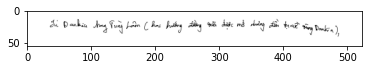

('Nguyễn thứ thợc, Lai xe Nguyễn thần Nghĩa lên đường.', 0.7660158517268988)


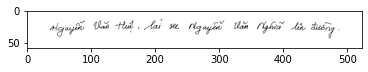

('cần thiết " đối chún vẫn " cấp trên của mình, Trước khi bộ thuán hệ trưởng là ông nga', 0.7895638877854628)


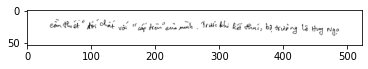

('vì công ây không nhực hiện đúng hợp đồng như đã cam lối. Trong có', 0.8399044071252529)


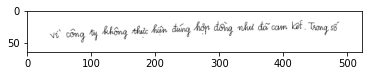

('những vàng xe cấp xức Buá Trưa Là - 14-1000 khi tôi 20ng ngôi má chuyện với các anh', 0.7626547150942217)


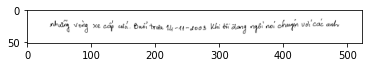

('Tây Nguyên và Nam bộ có khi năng số hiếu nước người vào bị mặn', 0.8714363997982394)


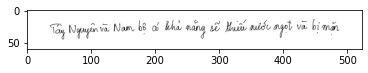

('tên phải có những công nhiên nhằm của như nhúc của các điệu. Tôi mát mài', 0.8115367620355554)


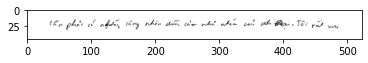

('hợp thành phòng tuyên báo vệ và làm chúa vùng biển.', 0.8782436123081282)


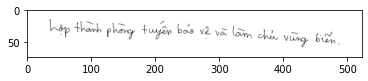

('để chim cát xa xên, tới tâm, chủ nhi giàn mút lo nổi... khôi', 0.7887549117207527)


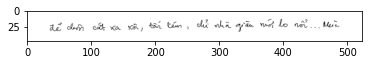

('bụ giảng này 1 mu hợn Và Nhi thống và đồn, bội tầy, là người 3, hai thàn ngọc ngọc.', 0.676585755793445)


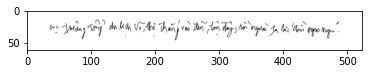

('các quan giải cách và biệt ninh ấy cấy những đạo trường cây chúng nến nước', 0.7888526266088357)


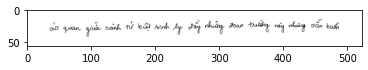

('thự lập mở binh lới mợ chuyên mác tranh đốt biển, thì hồi đối " nước đông kiểm, nhạ lập pha.', 0.6497404619889415)


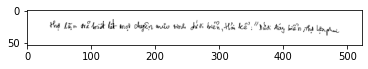

('lại trương khi ra đi. ""biết lớn vừng ở từng câu là cực. Nhưng vì cuộc', 0.8007355910326753)


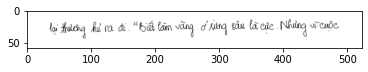

('dự mà đã gập ông bụyển thành phương, hó Viện kiến sử nhân', 0.7845091526968437)


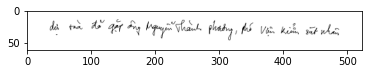

('ở không có quy đính nà, nhưng thao quy chế lâm việc từ tất trường những trục', 0.8007679878685036)


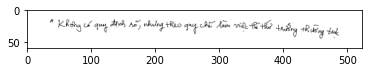

('Trong đó có xã quần đến Phong ân, Trường ân và - 577 đầu lớn, nhà ngần và', 0.8162630510656801)


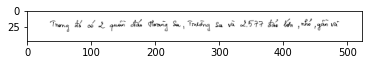

('nói vào đề mì đoàng mán, nấy thình m, ở phước gọi chim phải', 0.7065723955126132)


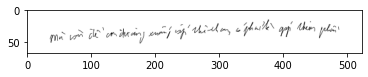

('Hội số người đã riệu được giấy pháp UBNI 0 văn Xuân Hóa để để đái nông mặt', 0.7693185373335272)


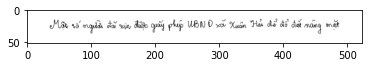

('Và nất nhiên gấy ghi chứp khác giờ sử hàng bái chủ số lượng đử thường tai Đi...11', 0.7913350505225453)


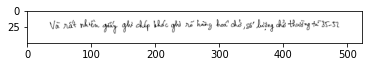

('Đồn lại có có kháng rao mở là các trạn hách và tro được na', 0.6652770967319094)


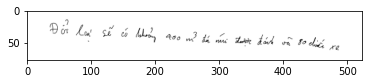

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [25]:
import os
dir = "./data_line/InkData_line_processed"
for img in os.listdir(dir):
    img = os.path.join(dir,img)
    img = Image.open(img)
    plt.imshow(img)
    s = detector.predict(img, return_prob=True)
    print(s)
    plt.show()

# Download sample dataset

In [22]:
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
100% 61.2M/61.2M [00:00<00:00, 128MB/s]


In [23]:
! unzip -qq -o ./data_line.zip

In [24]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 5007, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 5007 (delta 9), reused 8 (delta 3), pack-reused 4987
Receiving objects: 100% (5007/5007), 514.87 MiB | 48.48 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Checking out files: 100% (4801/4801), done.


In [4]:
import json
root = "/content/Vietnamese-HTR/data/"

def create_vietocr_annote(root, img_dir_name, output_name):
    #read the file
    with open(root + img_dir_name + "/labels.json") as file:
        labels = json.load(file)
    data = []
    for img_name in labels:
        data.append(f"{img_dir_name}/{img_name}\t{labels[img_name]}\n")


    #write back the file
    with open(root + output_name,"w") as f:
        f.writelines(data)
create_vietocr_annote(root, "0916_Data_Samples_2", "train_annotation.txt")
create_vietocr_annote(root, "1015_Private_Test", "test_annotation.txt")

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [5]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [6]:
config = Cfg.load_config_from_name('vgg_transformer')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/Vietnamese-HTR/data/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':10000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./drive/MyDrive/weights/transformerocr.pth',
          'metrics': 10000
         }

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['dataloader'].update(dataloader_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [9]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 2, 'pin_memory': True},
 'dataset': {'data_root': '/content/Vietnamese-HTR/data/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './drive/MyDrive/weights/transformerocr.pth',
  'iters': 10000,

You should train model from our pretrained 

In [10]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpp_4rbg3w/dl
100%|██████████| 152M/152M [00:01<00:00, 145MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|█████████████████████████████████████████| 1823/1823 [00:09<00:00, 191.77it/s]


Created dataset with 1822 samples


Create valid_hw: 100%|███████████████████████████████████████████| 549/549 [00:01<00:00, 288.14it/s]


Created dataset with 548 samples


valid_hw build cluster: 100%|██████████████████████████████████| 548/548 [00:00<00:00, 77719.57it/s]


Save model configuration for inference, load_config_from_file

In [11]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

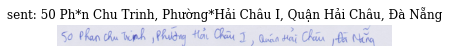

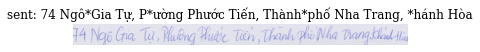

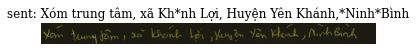

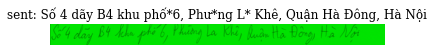

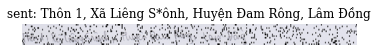

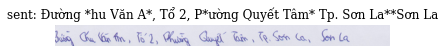

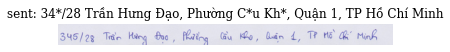

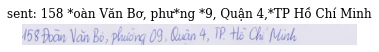

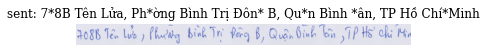

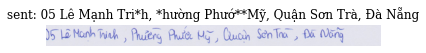

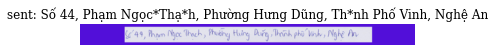

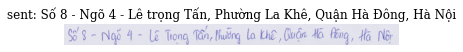

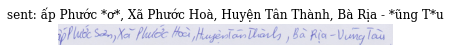

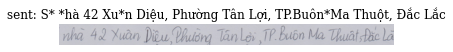

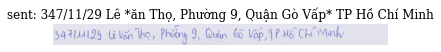

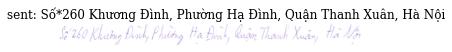

In [12]:
trainer.visualize_dataset()

Train now

In [13]:
trainer.train()

iter: 000200 - train loss: 1.186 - lr: 3.96e-05 - load time: 41.46 - gpu time: 136.91
iter: 000400 - train loss: 0.928 - lr: 1.12e-04 - load time: 36.45 - gpu time: 140.59
iter: 000600 - train loss: 0.838 - lr: 2.01e-04 - load time: 37.44 - gpu time: 140.57
iter: 000800 - train loss: 0.804 - lr: 2.73e-04 - load time: 42.60 - gpu time: 140.51
iter: 001000 - train loss: 0.785 - lr: 3.00e-04 - load time: 34.26 - gpu time: 140.63
iter: 001200 - train loss: 0.775 - lr: 3.00e-04 - load time: 39.05 - gpu time: 140.59
iter: 001400 - train loss: 0.764 - lr: 2.99e-04 - load time: 35.62 - gpu time: 140.18
iter: 001600 - train loss: 0.761 - lr: 2.97e-04 - load time: 48.90 - gpu time: 140.89
iter: 001800 - train loss: 0.754 - lr: 2.94e-04 - load time: 39.77 - gpu time: 140.64
iter: 002000 - train loss: 0.752 - lr: 2.91e-04 - load time: 38.17 - gpu time: 140.55
iter: 002200 - train loss: 0.752 - lr: 2.87e-04 - load time: 45.92 - gpu time: 140.95
iter: 002400 - train loss: 0.746 - lr: 2.82e-04 - load

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

NameError: ignored

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.2647058823529412, 0.74901867)